# Maxima's `plotdf`

The `plotdf` [function](http://maxima.sourceforge.net/docs/manual/de/maxima_66.html) provided by Maxima is only supported in XMaxima. Repeated attempts to use `plotdf` in Jupyter Maxima notebooks have failed consistently. The same holds true when trying to use `ploteq`.

# An Alternative

However, in Professor G. Jay Kerns' booklet [Multivariable Calculus with Maxima](https://www.gkerns.people.ysu.edu/maxima/maximaintro/maximaintro.pdf), another option is provided, and this one lets us render vector fields in a Maxima Jupyter notebook.

## Setup

In [1]:
set_plot_option([svg_file, "maxplot.svg"])$
set_draw_defaults(terminal=svg)$

load(draw)$
load(vect)$

## Vector Fields

In [2]:
coord: setify(makelist(k, k, -4, 4));

(%o6)                 {- 4, - 3, - 2, - 1, 0, 1, 2, 3, 4}

In [3]:
points2d: listify(cartesian_product (coord, coord))$
vf2d(x,y):=  vector([x, y], [cos(y), x]/6)$
vect2: makelist(vf2d(k[1], k[2]), k, points2d)$

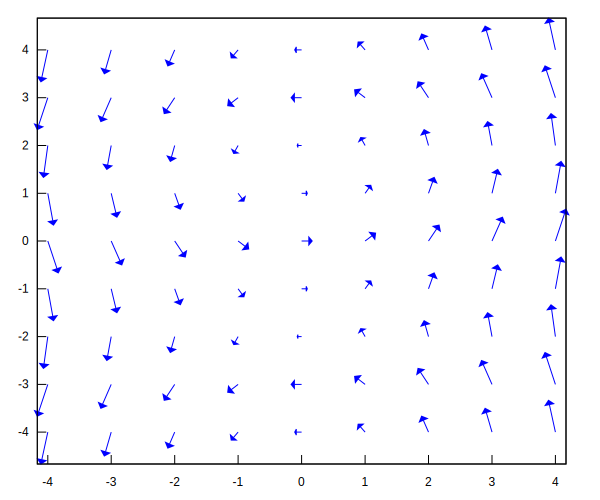

In [4]:
apply(draw2d, append([head_length=0.1, color=blue], vect2))$

## Gradient Vector Fields

In [5]:
kill(f, x, y, gdf)$
f(x,y) := x^2 - y^2;

                                          2    2
(%o12)                        f(x, y) := x  - y

In [6]:
scalefactors([x, y])$
gdf(x,y) := grad(f(x, y))$
ev(express(gdf(x, y)), diff)$
define(gdf(x, y), %);

(%o16)                     gdf(x, y) := [2 x, - 2 y]

In [7]:
vf2d(x, y) :=  vector([x, y], gdf(x, y)/8)$
vect2: makelist(vf2d(k[1], k[2]), k, points2d)$

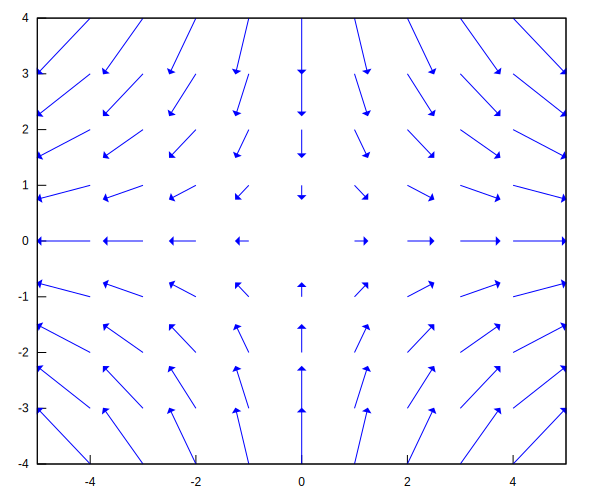

In [8]:
apply(draw2d, append([head_length=0.1, color=blue], vect2))$

## Three Dimensions

In [9]:
coord: setify(makelist(k, k, -2, 2))$
points3d: listify(cartesian_product(coord, coord, coord))$
vf3d(x, y, z) :=  vector([x, y, z], [z, x, y]/8)$
vect3: makelist(vf3d(k[1], k[2], k[3]), k, points3d)$

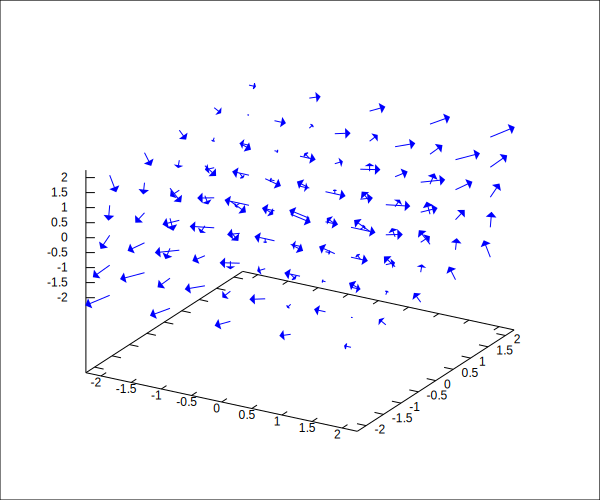

In [10]:
apply(draw3d, append([head_length=0.05, color=blue], vect3))$